# Design Optimization of a Welded Beam
This example shows how to examine the tradeoff between the strength and cost of a beam.



**Import Necessary Libraries**

In [39]:
#importing numpy
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
load = 6000;
g1_counter, g2_counter, g3_counter, g4_counter, fx_counter  = 0, 0, 0, 0, 0

**Define f(x) function**

In [40]:
def minimize_function(x):
    """
    Objective function -- given function
    """
    [x1, x2, x3, x4] = x
    global fx_counter
    fx_counter = fx_counter + 1
    return (1.10471*(x1)**2*(x2) + 0.04811*(x3)*(x4)*(14.0 + x2))

**Define g1(x) function**

In [41]:
#g1(x) = 13600 −τ(x) ≥0, In summary, the shear stress on the welds has the constraint τ(x) <= 13600

def g1(x):
  global g1_counter
  g1_counter = g1_counter + 1
  return 13600 - tau(x) 

def tau(x):
	return math.sqrt((dtau(x) ** 2 + d2tau(x) ** 2)+ (x[1] * dtau(x) * d2tau(x))/math.sqrt(0.25*(x[1] ** 2 +(x[0] + x[2])**2)))

def dtau(x):
	return 6000/ (math.sqrt(2) * x[0] * x[1])

def d2tau(x):
	return (6000*(14 + 0.5 * x[1]) * math.sqrt(0.25 * (x[1]**2 + (x[0] + x[2]) ** 2))) / ( 2 * (0.707 * x[0] * x[1] * ((x[1] ** 2/ 12) + 0.25 * (x[0] + x[2]) ** 2)))

**Defind g2(x) function**

In [42]:
#g2(x) = 30000 −σ(x) ≥0, The normal stress σ(x) on the welds cannot exceed 30,000 psi. 
def g2(x):
  global g2_counter 
  g2_counter = g2_counter + 1
  constant_value = 504000 
  denominator = ((x[2]**2) * x[3])
  sigma =  constant_value / denominator
  
  return 30000 - sigma

**Define g3(x) function**

In [43]:
# g3(x) The weld thickness cannot exceed the beam width. In symbols, x4 - x1 >= 0
def g3(x):
  global g3_counter 
  g3_counter = g3_counter + 1
  return x[3] - x[0]

**Define g4(x) function**

In [44]:
#g4(x) = P(x) − 6000 ≥0; The buckling load capacity in the vertical direction must exceed the applied load of 6,000 lbs
def g4(x):
  global g4_counter 
  g4_counter = g4_counter + 1
  
  constant_value = 64746.022;
  a = 1- (0.0282346 * x[2]);
  b = x[2] * (x[3]**3);
  buckling_load = constant_value * a * b 
  return buckling_load

**Checking Bounds**

In [45]:
#x1,x2 ∈[0.125,5] ⊂R 
def check_x1_x2_bound():
  if ((x[0] >= 0.125 and  x[0] <= 5) and (x[1] >= 0.125 and x[1] <= 5)):
    print("Constrains met")
  else:
    print("constrains not met")


#x3,x4 ∈[0.1,10] ⊂R.
def check_x3_x4_bound():

  if ((x[2] >= 0.1 and x[2] <= 10) and (x[3] >= 0.1 and x [3] <= 10)):
    print("Constrains met")
  else:
    print("Constrain not met")

 **For validating your function implementations, you must use the following code in your
notebook and ensure that your code is producing the same outputs (accurate up to 3 decimal
places)**

In [46]:
x = np.array([1.05, 3.15, 4.43, 7.87])
print("Objective function output: ", minimize_function(x))
print("Firt constraint function output: ", g1(x))
print("Second constraint function output: ", g2(x))
print("Third constraint function output: ", g3(x))
print("Fourth constraint function output: ", g4(x))

Objective function output:  32.6024179859
Firt constraint function output:  5308.848564674312
Second constraint function output:  26736.764990548952
Third constraint function output:  6.82
Fourth constraint function output:  122323448.61430934


In [47]:
#generate data points
def points_to_evaluate(max_iter, lower_bound,upper_bound):
  x_arr = np.random.uniform(low = lower_bound, high = upper_bound, size = (max_iter,4))
  return x_arr

In [48]:
def deathpenalty(minimize_function, penalty, x):

  if (g1(x) >= 0 and g2(x) >= 0 and g3(x) >= 0 and g4(x) >= 0):
    return minimize_function(x)
  else:
    return penalty

In [49]:
def random_search(function, max_iter, lower_bound, 
                  upper_bound, penalty):
    samples = points_to_evaluate(max_iter, lower_bound, upper_bound)
    results = np.array([deathpenalty(function, penalty, point) 
               for point in samples])
    best_ind = np.argmin(results)
    return samples[best_ind], results[best_ind]

In [50]:
# define hyper-paramters
penalty = 200
number_of_samples = 1000
lower_bound = np.array([0.125,0.125,0.1,0.1])
upper_bound = np.array([5,5,10,10])
res = random_search(minimize_function, number_of_samples,
                    lower_bound, upper_bound, penalty)


In [51]:
print("The best solution is:{} with the function value of  {:.2f}".format(res[0], res[1]))

The best solution is:[0.59707299 1.98828657 8.72490433 1.28707532] with the function value of  9.42


In [52]:
n_repeats = 21

# run random search and pick the best value
res_random = [random_search(minimize_function, number_of_samples,
                  lower_bound, upper_bound, penalty)[-1]
            for i in range(n_repeats)]

Text(0, 0.5, 'Best Objective Value')

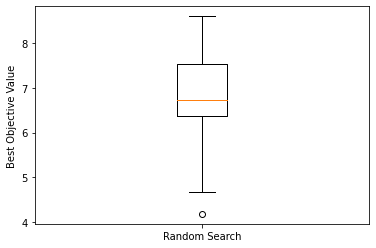

In [53]:
plt.boxplot([res_random])
plt.xticks([1], ['Random Search'])
plt.ylabel("Best Objective Value")

# Simulated Annealing with Death Penalty

In [54]:
def bound_check(low, high, x):
  for i in range(len(x)):
    if(x[i] < low[i] or x[i] > high[i]):
      return False
  return True

<ipython-input-55-6732df45dec9>:40: RuntimeWarning: overflow encountered in exp
  metropolis = exp(-diff / t)


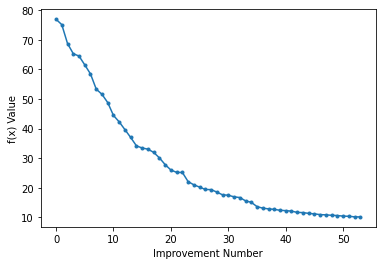

In [55]:
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
 

# define simulated annealing algo
def simulated_annealing(minimize_function, bounds, iter, step_size, temp, penalty):
	
	
	best = np.random.uniform(low = lower_bound, high = upper_bound, size = (1,4))[0]
	
	# evaluate the initial point
	best_eval = deathpenalty(minimize_function, penalty, best)
	curr, curr_eval = best, best_eval
	scores = list()
	# run the algorithm
	for i in range(iter):
		
		flag = False
		while (not flag):
			candidate = curr + randn(len(bounds)) * step_size
			flag = bound_check(lower_bound, upper_bound, candidate)
		# evaluate candidate point
		candidate_eval = deathpenalty(minimize_function, penalty, candidate)
		# check for new best solution
		if candidate_eval < best_eval:
			# new best point
			best, best_eval = candidate, candidate_eval
			# append scores
			scores.append(best_eval)
			
			# print('>%d f(%s) = %.5f' % (i, best, best_eval))
		# difference between candidate and current point evaluation
		diff = candidate_eval - curr_eval
		# calculate temperature for current epoch
		t = temp / float(i + 1)
		# calculate metropolis acceptance criterion (wiki)
		metropolis = exp(-diff / t)
		# check if we should keep the new point
		if diff < 0 or rand() < metropolis:
			# store the new current point
			curr, curr_eval = candidate, candidate_eval
	return [best, best_eval, scores]
 

seed(1)
#x1,x2 ∈[0.125,5] ⊂R, and (6)
#x3,x4 ∈[0.1,10] ⊂R.
# bound
bounds = [[0.125, 5],[0.125, 5],[0.1, 10],[0.1, 10]]

iter = 1000
step_size = 0.1
# initial
temp = 10

# perform SA
best, score, scores = simulated_annealing(minimize_function, bounds, iter, step_size, temp, penalty)
# print('f(%s) = %f' % (best, score))
# line plot of best scores
pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('f(x) Value')
pyplot.show()

In [56]:
n_repeats = 21
res_SA = []
test = []
for i in range(n_repeats):
  x,y,z = simulated_annealing(minimize_function, bounds, iter, step_size, temp, penalty)
  res_SA.append(y)
  test.append(x)
# # run random search and pick the best value
# for i in range(21):
#   print(test[i],res_SA[i])
# print(len(res_SA))
# print(res_SA)

<ipython-input-55-6732df45dec9>:40: RuntimeWarning: overflow encountered in exp
  metropolis = exp(-diff / t)


Text(0, 0.5, 'Best Objective Value')

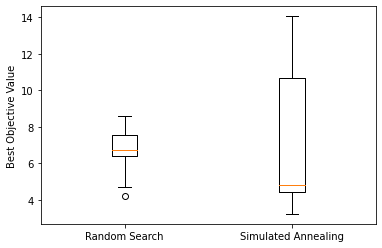

In [57]:

plt.boxplot([res_random, res_SA])
plt.xticks([1,2], ['Random Search', 'Simulated Annealing'])
plt.ylabel("Best Objective Value")

From the Box plot, we can compare our results between Random Search with death Penalty and Simulated Annealing with death penalty. The box in a box plot shows you the interquartile range , meaning data falling between the first and third quartile

As we can observe, simulated annealing gives us a better answer than random search. The median is lower. The median is the average value from a set of data and is shown by the line that divides the box into two parts.

In the random search, we also see that getting an extreme value (outlier) is quite plausable since the data points are chosen randomly. 

Using static penalty will probably work better with SA than death penalty. I can probably do further experiment on this. 